In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/processed/clusters_aabr.csv")
df

,FECHA,AÑO,MES,ESTACIÓN DEL AÑO,EVENTO INTERANUAL,Estacion,TSM,Chla,Longitud,Latitud,MES_NUM,ONI,Cluster
0,1997-09-01,1997,Septiembre,Otoño,Niño,Est 1°,31.4417,0.1351,-109.3,23.8,9,2.3,3
1,1997-10-01,1997,Octubre,Otoño,Niño,Est 1°,30.5750,0.1281,-109.3,23.8,10,2.4,3
2,1997-11-01,1997,Noviembre,Otoño,Niño,Est 1°,27.8917,0.2229,-109.3,23.8,11,2.4,3
3,1997-12-01,1997,Diciembre,Invierno,Niño,Est 1°,25.8250,0.4121,-109.3,23.8,12,2.2,3
4,1998-01-01,1998,Enero,Invierno,Niño,Est 1°,24.8000,0.4254,-109.3,23.8,1,1.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,2018-06-01,2018,Junio,Verano,Normal,Est 17°,27.7339,0.7906,-114.5,30.7,6,0.1,0
4314,2018-07-01,2018,Julio,Verano,Normal,Est 17°,31.0978,0.5574,-114.5,30.7,7,0.2,0
4315,2018-08-01,2018,Agosto,Verano,Normal,Est 17°,32.1800,0.9043,-114.5,30.7,8,0.5,0
4316,2018-09-01,2018,Septiembre,Otoño,Niño,Est 17°,31.6606,1.4022,-114.5,30.7,9,0.8,0


In [3]:
est_1_df = df[df["Estacion"] == "Est 1°"]
est_1_df.head()

,FECHA,AÑO,MES,ESTACIÓN DEL AÑO,EVENTO INTERANUAL,Estacion,TSM,Chla,Longitud,Latitud,MES_NUM,ONI,Cluster
0,1997-09-01,1997,Septiembre,Otoño,Niño,Est 1°,31.4417,0.1351,-109.3,23.8,9,2.3,3
1,1997-10-01,1997,Octubre,Otoño,Niño,Est 1°,30.5750,0.1281,-109.3,23.8,10,2.4,3
2,1997-11-01,1997,Noviembre,Otoño,Niño,Est 1°,27.8917,0.2229,-109.3,23.8,11,2.4,3
3,1997-12-01,1997,Diciembre,Invierno,Niño,Est 1°,25.8250,0.4121,-109.3,23.8,12,2.2,3
4,1998-01-01,1998,Enero,Invierno,Niño,Est 1°,24.8000,0.4254,-109.3,23.8,1,1.9,3


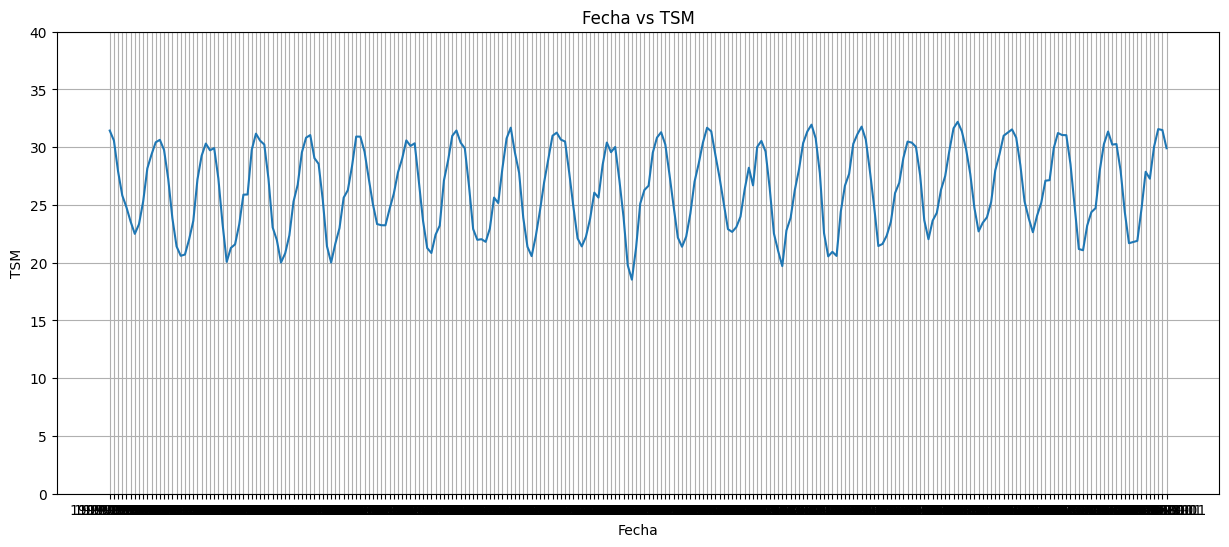

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(est_1_df["FECHA"], est_1_df["TSM"])
plt.title("Fecha vs TSM")
plt.xlabel("Fecha")
plt.ylabel("TSM")
plt.ylim(0, 40)
plt.grid(True)
plt.show()

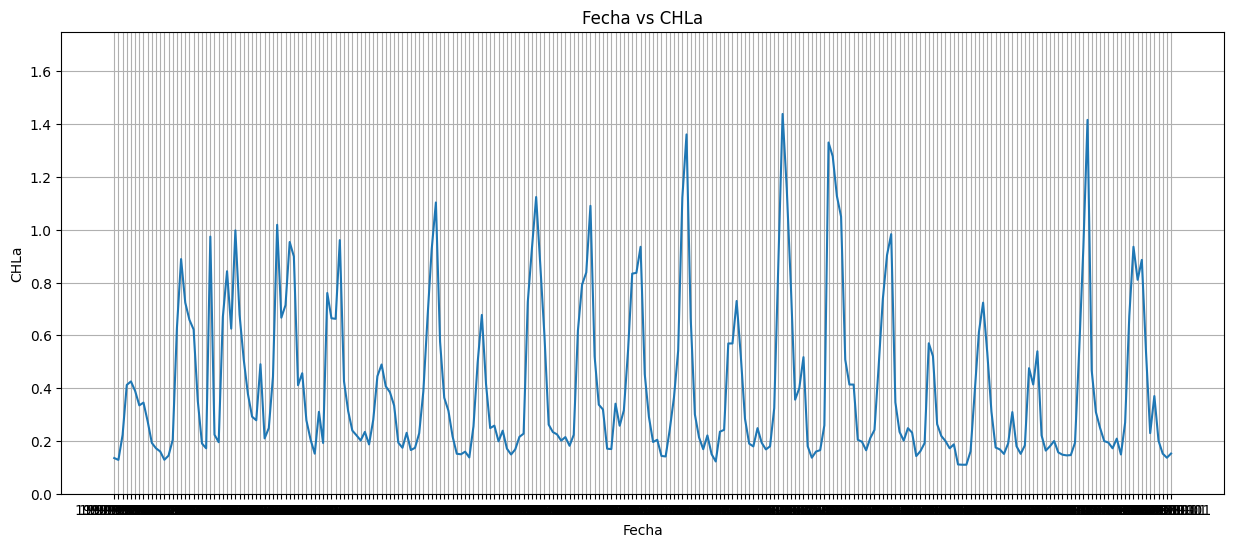

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(est_1_df["FECHA"], est_1_df["Chla"])
plt.title("Fecha vs CHLa")
plt.xlabel("Fecha")
plt.ylabel("CHLa")
plt.ylim(0, 1.75)
plt.grid(True)
plt.show()

In [6]:
from prophet import Prophet

/mnt/5228752828750BEB/Maestría/semestre_2/estadistica/ae-oceanografia-golfo-cali/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [7]:
est_1_tsm_df = est_1_df[["FECHA", "TSM"]].rename(columns={"FECHA": "ds", "TSM": "y"})
est_1_tsm_df

,ds,y
0,1997-09-01,31.4417
1,1997-10-01,30.5750
2,1997-11-01,27.8917
3,1997-12-01,25.8250
4,1998-01-01,24.8000
...,...,...
249,2018-06-01,27.2756
250,2018-07-01,30.0300
251,2018-08-01,31.5683
252,2018-09-01,31.4872


In [8]:
total = len(est_1_tsm_df["ds"])
threshold = int(total * 0.8)
est_1_tsm_train_df = est_1_tsm_df[:threshold]
est_1_tsm_test_df = est_1_tsm_df[threshold:]

In [9]:
prophet_model = Prophet()
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(est_1_tsm_train_df)

19:02:23 - cmdstanpy - INFO - Chain [1] start processing
19:02:23 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
est_1_tsm_prediction_df = prophet_model.predict(est_1_tsm_train_df)
est_1_tsm_prediction_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1997-09-01,32.165106,31.150808,33.148452
1,1997-10-01,30.469082,29.400081,31.470522
2,1997-11-01,28.681827,27.649807,29.733769
3,1997-12-01,24.680160,23.545225,25.676239
4,1998-01-01,23.205373,22.107239,24.212514
...,...,...,...,...
198,2014-03-01,24.451139,23.414216,25.482540
199,2014-04-01,24.942177,23.918413,26.006956
200,2014-05-01,28.117317,27.127224,29.142792
201,2014-06-01,28.655518,27.596722,29.675277


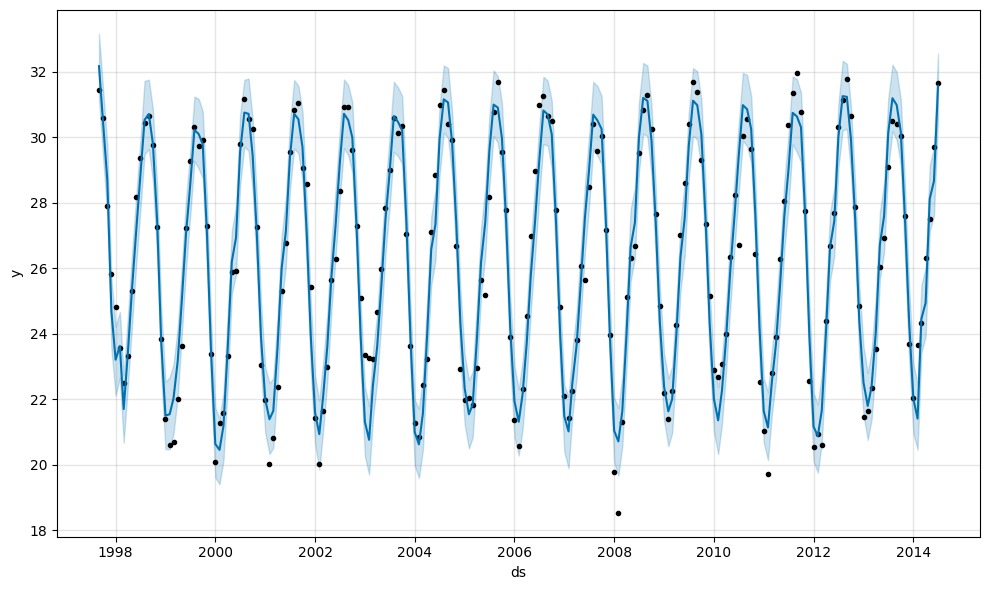

In [11]:
fig1 = prophet_model.plot(est_1_tsm_prediction_df)

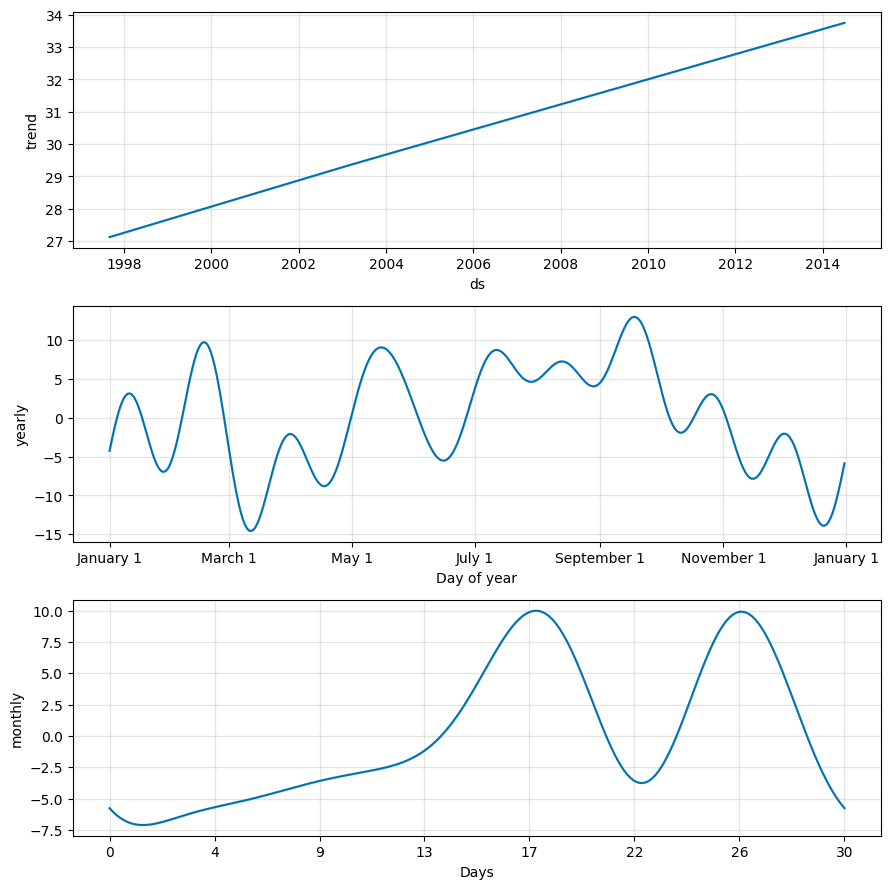

In [12]:
fig2 = prophet_model.plot_components(est_1_tsm_prediction_df)

In [13]:
est_1_tsm_dt_df = est_1_tsm_df.copy()
est_1_tsm_dt_df["ds"] = pd.to_datetime(est_1_tsm_dt_df["ds"])
est_1_tsm_dt_df["month"] = est_1_tsm_dt_df["ds"].dt.month

est_1_tsm_dt_df

,ds,y,month
0,1997-09-01,31.4417,9
1,1997-10-01,30.5750,10
2,1997-11-01,27.8917,11
3,1997-12-01,25.8250,12
4,1998-01-01,24.8000,1
...,...,...,...
249,2018-06-01,27.2756,6
250,2018-07-01,30.0300,7
251,2018-08-01,31.5683,8
252,2018-09-01,31.4872,9


In [14]:
avg_monthly_tsm = []
for month in range(1, 13):
    monthly_avg = est_1_tsm_dt_df[est_1_tsm_dt_df["month"] == month]["y"].mean()
    avg_monthly_tsm.append(monthly_avg)
avg_monthly_tsm

[np.float64(21.86391904761905),
 np.float64(21.479319047619047),
 np.float64(22.33782857142857),
 np.float64(24.01052857142857),
 np.float64(26.256619047619047),
 np.float64(27.541985714285715),
 np.float64(29.674947619047618),
 np.float64(31.013600000000004),
 np.float64(30.900404545454556),
 np.float64(30.09145454545455),
 np.float64(27.58462857142857),
 np.float64(24.224214285714282)]

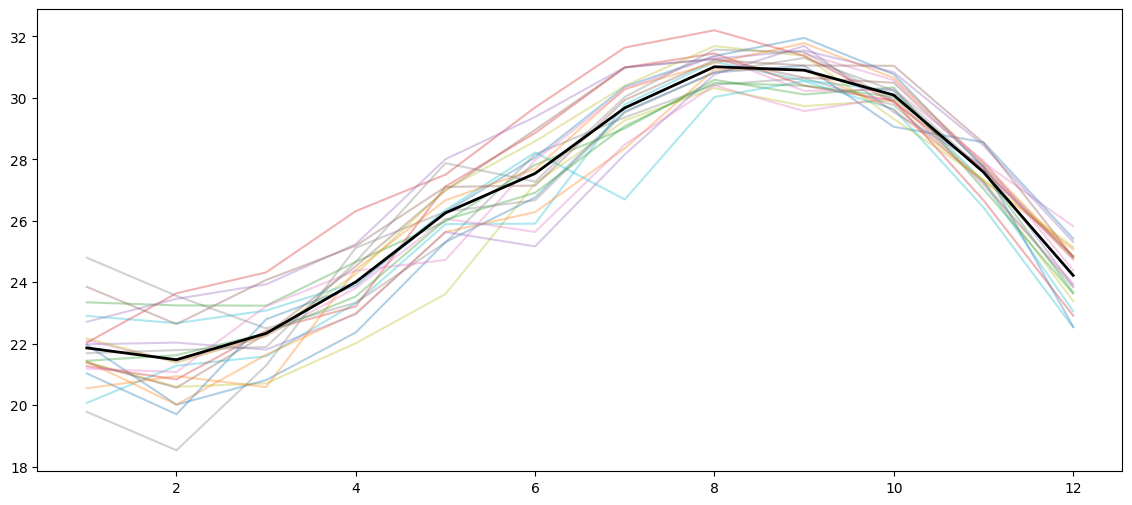

In [17]:
plt.figure(figsize=(14, 6))
for i in range(1981, 2019):
    plt.plot(est_1_tsm_dt_df[est_1_tsm_dt_df["ds"].dt.year == i]["month"],
             est_1_tsm_dt_df[est_1_tsm_dt_df["ds"].dt.year == i]["y"], alpha=0.35)
plt.plot(range(1, 13), avg_monthly_tsm, color="black", linewidth=2)    


plt.show()

In [19]:
df["FECHA"] = pd.to_datetime(df["FECHA"])
df

,FECHA,AÑO,MES,ESTACIÓN DEL AÑO,EVENTO INTERANUAL,Estacion,TSM,Chla,Longitud,Latitud,MES_NUM,ONI,Cluster
0,1997-09-01,1997,Septiembre,Otoño,Niño,Est 1°,31.4417,0.1351,-109.3,23.8,9,2.3,3
1,1997-10-01,1997,Octubre,Otoño,Niño,Est 1°,30.5750,0.1281,-109.3,23.8,10,2.4,3
2,1997-11-01,1997,Noviembre,Otoño,Niño,Est 1°,27.8917,0.2229,-109.3,23.8,11,2.4,3
3,1997-12-01,1997,Diciembre,Invierno,Niño,Est 1°,25.8250,0.4121,-109.3,23.8,12,2.2,3
4,1998-01-01,1998,Enero,Invierno,Niño,Est 1°,24.8000,0.4254,-109.3,23.8,1,1.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,2018-06-01,2018,Junio,Verano,Normal,Est 17°,27.7339,0.7906,-114.5,30.7,6,0.1,0
4314,2018-07-01,2018,Julio,Verano,Normal,Est 17°,31.0978,0.5574,-114.5,30.7,7,0.2,0
4315,2018-08-01,2018,Agosto,Verano,Normal,Est 17°,32.1800,0.9043,-114.5,30.7,8,0.5,0
4316,2018-09-01,2018,Septiembre,Otoño,Niño,Est 17°,31.6606,1.4022,-114.5,30.7,9,0.8,0


In [20]:
cluster_df = df[["FECHA", "Estacion", "TSM", "Chla", "EVENTO INTERANUAL", "ONI", "Cluster"]]

cluster_0_df = cluster_df[cluster_df["Cluster"] == 0]
cluster_1_df = cluster_df[cluster_df["Cluster"] == 1]
cluster_2_df = cluster_df[cluster_df["Cluster"] == 2]
cluster_3_df = cluster_df[cluster_df["Cluster"] == 3]

In [46]:
# TSM

cluster_0_df_tsm = cluster_0_df[["FECHA", "TSM"]].rename(columns={"FECHA": "ds", "TSM": "y"})
prophet_model_0_tsm = Prophet()
prophet_model_0_tsm.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_0_tsm.fit(cluster_0_df_tsm)

cluster_1_df_tsm = cluster_1_df[["FECHA", "TSM"]].rename(columns={"FECHA": "ds", "TSM": "y"})
prophet_model_1_tsm = Prophet()
prophet_model_1_tsm.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_1_tsm.fit(cluster_1_df_tsm)

cluster_2_df_tsm = cluster_2_df[["FECHA", "TSM"]].rename(columns={"FECHA": "ds", "TSM": "y"})
prophet_model_2_tsm = Prophet()
prophet_model_2_tsm.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_2_tsm.fit(cluster_2_df_tsm)

cluster_3_df_tsm = cluster_3_df[["FECHA", "TSM"]].rename(columns={"FECHA": "ds", "TSM": "y"})
prophet_model_3_tsm = Prophet()
prophet_model_3_tsm.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_3_tsm.fit(cluster_3_df_tsm)

# CHLa

cluster_0_df_chla = cluster_0_df[["FECHA", "Chla"]].rename(columns={"FECHA": "ds", "Chla": "y"})
prophet_model_0_chla = Prophet()
prophet_model_0_chla.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_0_chla.fit(cluster_0_df_chla)

cluster_1_df_chla = cluster_1_df[["FECHA", "Chla"]].rename(columns={"FECHA": "ds", "Chla": "y"})
prophet_model_1_chla = Prophet()
prophet_model_1_chla.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_1_chla.fit(cluster_1_df_chla)

cluster_2_df_chla = cluster_2_df[["FECHA", "Chla"]].rename(columns={"FECHA": "ds", "Chla": "y"})
prophet_model_2_chla = Prophet()
prophet_model_2_chla.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_2_chla.fit(cluster_2_df_chla)

cluster_3_df_chla = cluster_3_df[["FECHA", "Chla"]].rename(columns={"FECHA": "ds", "Chla": "y"})
prophet_model_3_chla = Prophet()
prophet_model_3_chla.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model_3_chla.fit(cluster_3_df_chla)

12:53:29 - cmdstanpy - INFO - Chain [1] start processing
12:53:29 - cmdstanpy - INFO - Chain [1] done processing
12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing
12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# TSM

cluster_0_df_tsm_pred = prophet_model_0_tsm.predict(cluster_0_df_tsm)
cluster_1_df_tsm_pred = prophet_model_1_tsm.predict(cluster_1_df_tsm)
cluster_2_df_tsm_pred = prophet_model_2_tsm.predict(cluster_2_df_tsm)
cluster_3_df_tsm_pred = prophet_model_3_tsm.predict(cluster_3_df_tsm)

# CHLa

cluster_0_df_chla_pred = prophet_model_0_chla.predict(cluster_0_df_chla)
cluster_1_df_chla_pred = prophet_model_1_chla.predict(cluster_1_df_chla)
cluster_2_df_chla_pred = prophet_model_2_chla.predict(cluster_2_df_chla)
cluster_3_df_chla_pred = prophet_model_3_chla.predict(cluster_3_df_chla)

(0.0, 40.0)

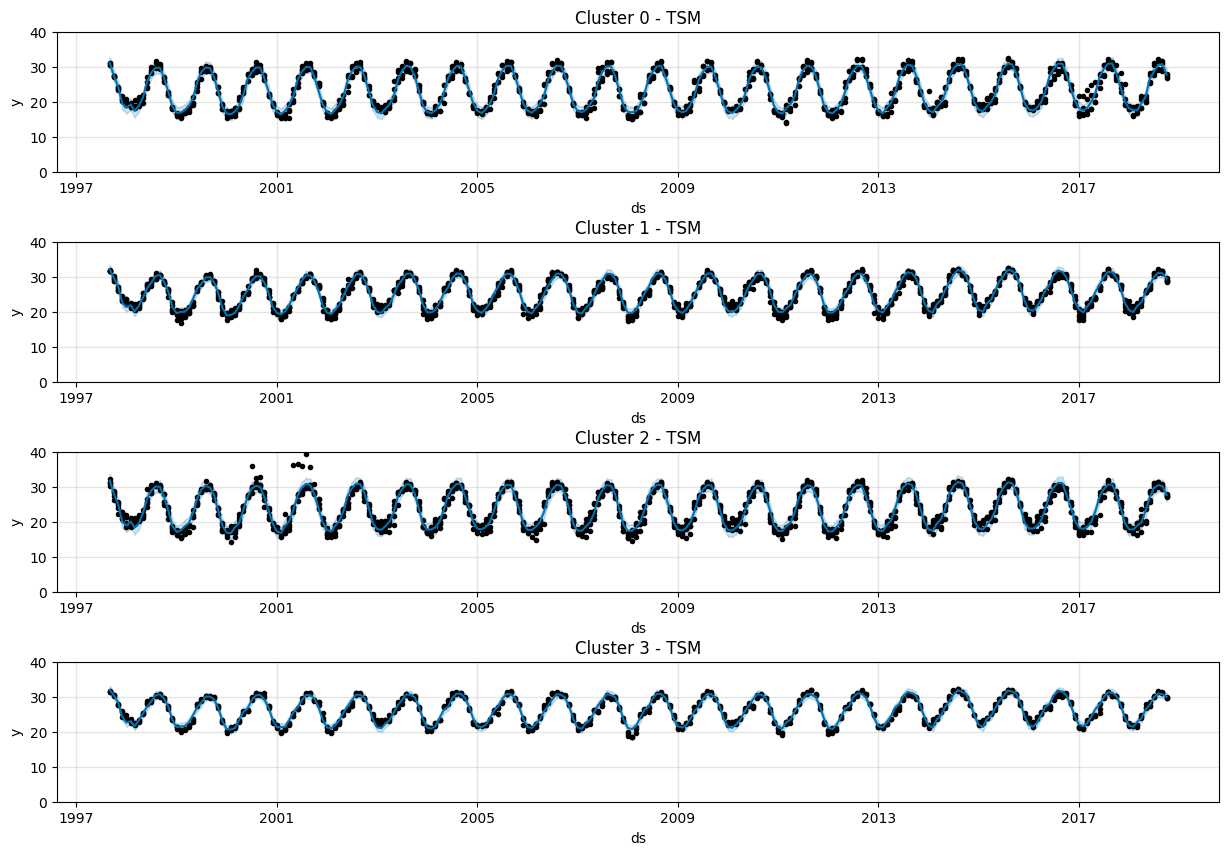

In [34]:
fig, axs = plt.subplots(4)
fig.set_size_inches(15, 10)
fig.subplots_adjust(hspace=0.5)
prophet_model_0_tsm.plot(cluster_0_df_tsm_pred, ax=axs[0])
axs[0].set_title('Cluster 0 - TSM')
axs[0].set_ylim(0,40)
prophet_model_1_tsm.plot(cluster_1_df_tsm_pred, ax=axs[1])
axs[1].set_title('Cluster 1 - TSM')
axs[1].set_ylim(0,40)
prophet_model_2_tsm.plot(cluster_2_df_tsm_pred, ax=axs[2])
axs[2].set_title('Cluster 2 - TSM')
axs[2].set_ylim(0,40)
prophet_model_3_tsm.plot(cluster_3_df_tsm_pred, ax=axs[3])
axs[3].set_title('Cluster 3 - TSM')
axs[3].set_ylim(0,40)


(0.0, 10.0)

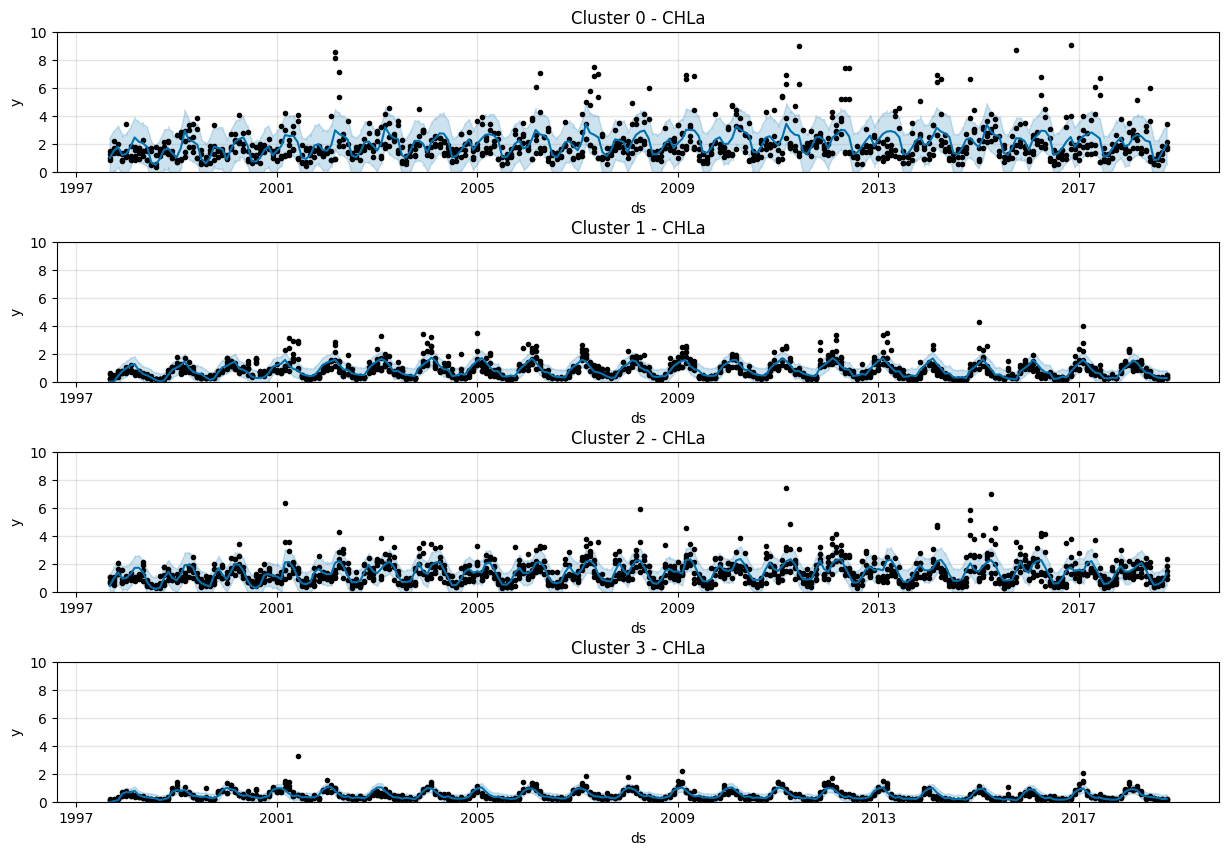

In [49]:
fig, axs = plt.subplots(4)
fig.set_size_inches(15, 10)
fig.subplots_adjust(hspace=0.5)
prophet_model_0_chla.plot(cluster_0_df_chla_pred, ax=axs[0])
axs[0].set_title('Cluster 0 - CHLa')
axs[0].set_ylim(0,10)
prophet_model_1_chla.plot(cluster_1_df_chla_pred, ax=axs[1])
axs[1].set_title('Cluster 1 - CHLa')
axs[1].set_ylim(0,10)
prophet_model_2_chla.plot(cluster_2_df_chla_pred, ax=axs[2])
axs[2].set_title('Cluster 2 - CHLa')
axs[2].set_ylim(0,10)
prophet_model_3_chla.plot(cluster_3_df_chla_pred, ax=axs[3])
axs[3].set_title('Cluster 3 - CHLa')
axs[3].set_ylim(0,10)


# TSM por Cluster

Parece ser que, a lo largo de los años, la temperatura ha tendido a aumentar. En el Cluster 0 puede verse un aumento estable y constante, mientras que en los demás se nota una tendencia fluctuante, aunque generalmente en aumento.

Text(0.5, 1.0, 'Cluster 0 - TSM - Components')

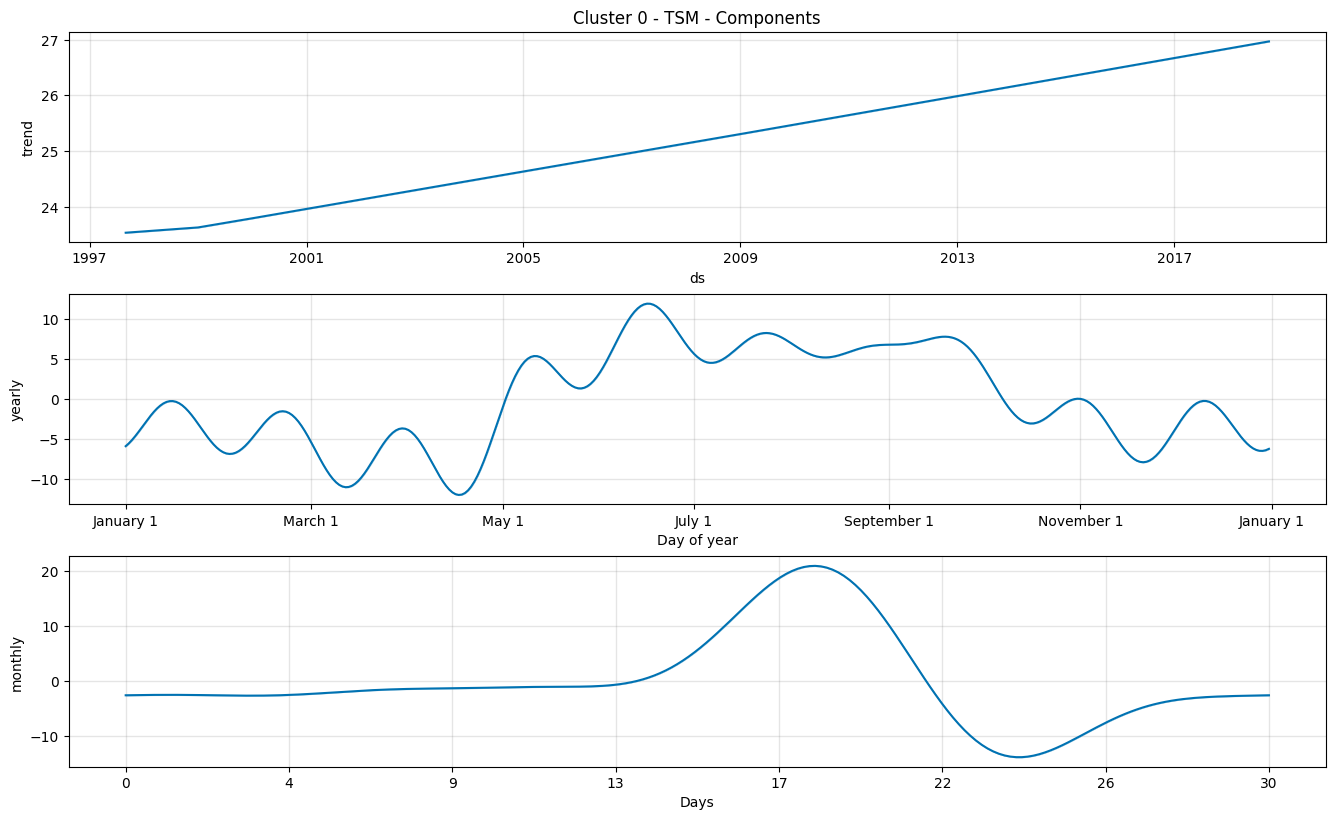

In [41]:
components_0_tsm_fig = prophet_model_0_tsm.plot_components(cluster_0_df_tsm_pred)
components_0_tsm_fig.set_size_inches(14, 8)
axes = components_0_tsm_fig.get_axes()
axes[0].set_title("Cluster 0 - TSM - Components")

Text(0.5, 1.0, 'Cluster 1 - TSM - Components')

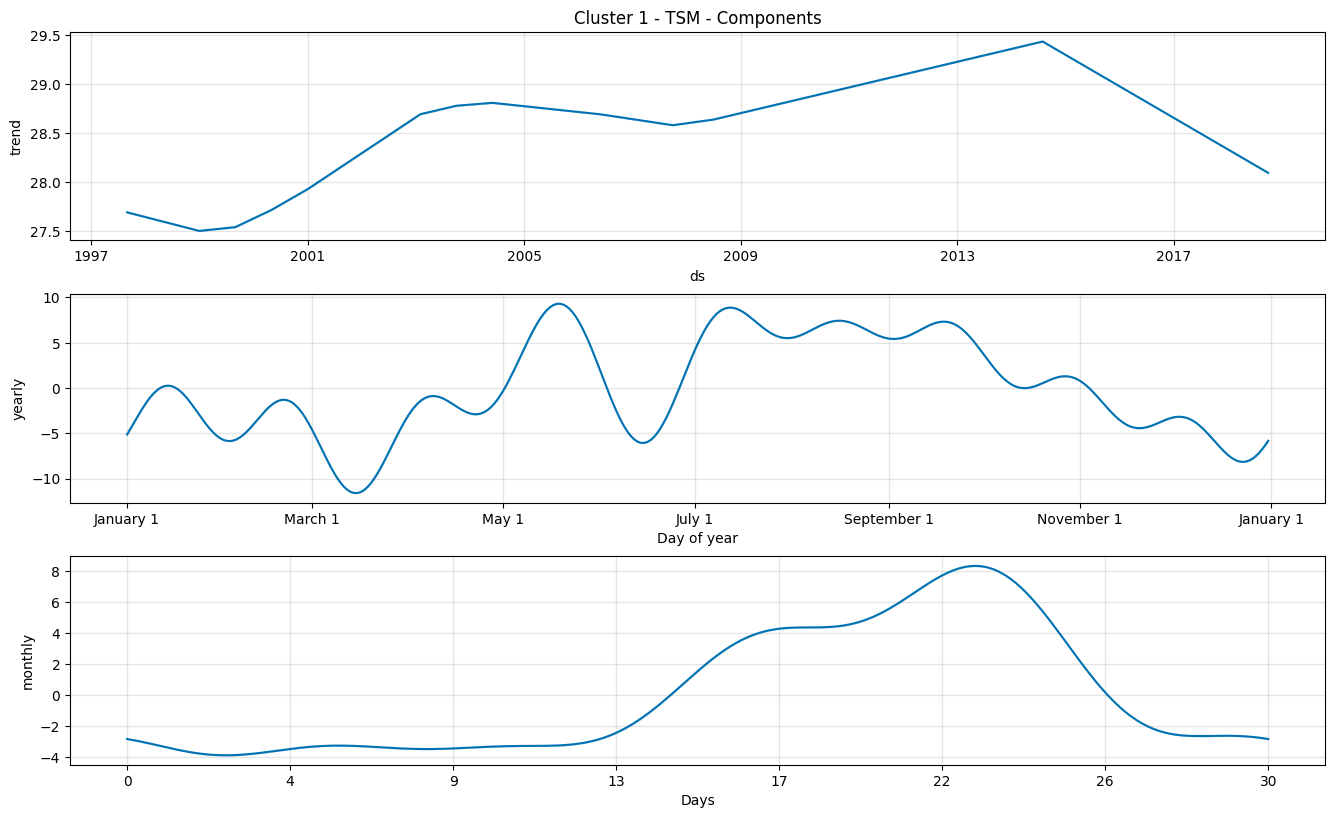

In [42]:

components_1_tsm_fig = prophet_model_1_tsm.plot_components(cluster_1_df_tsm_pred)
components_1_tsm_fig.set_size_inches(14, 8)
axes = components_1_tsm_fig.get_axes()
axes[0].set_title("Cluster 1 - TSM - Components")

Text(0.5, 1.0, 'Cluster 2 - TSM - Components')

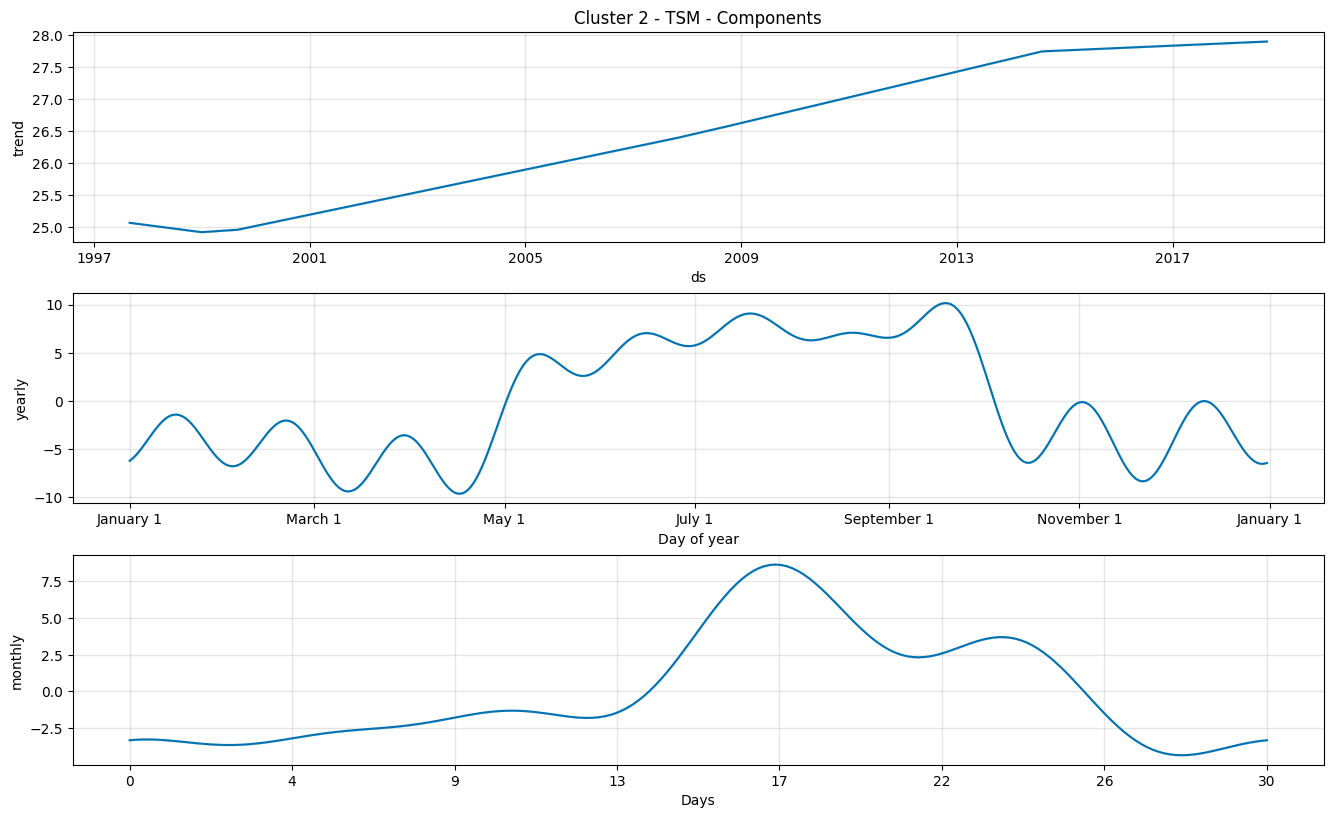

In [43]:
components_2_tsm_fig = prophet_model_2_tsm.plot_components(cluster_2_df_tsm_pred)
components_2_tsm_fig.set_size_inches(14, 8)
axes = components_2_tsm_fig.get_axes()
axes[0].set_title("Cluster 2 - TSM - Components")

Text(0.5, 1.0, 'Cluster 3 - TSM - Components')

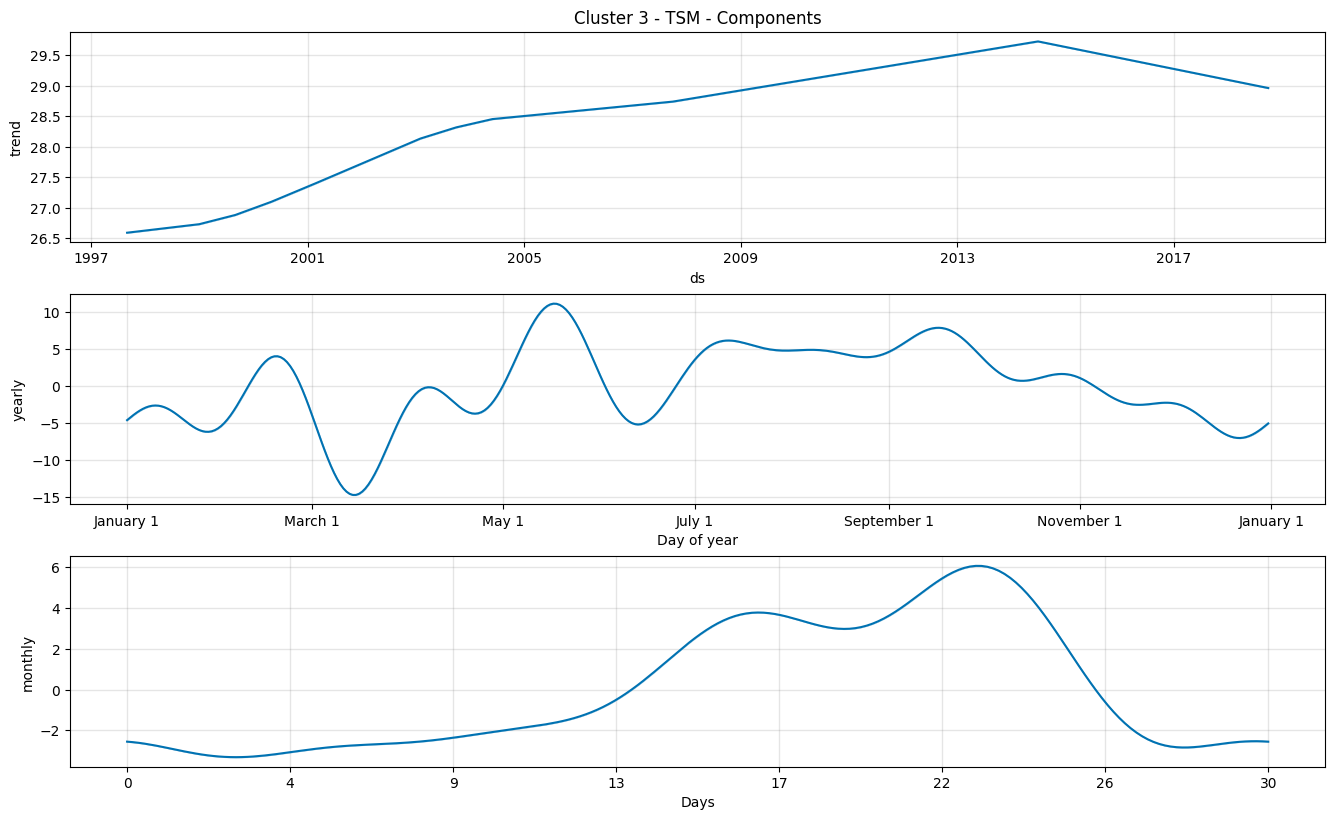

In [44]:
components_3_tsm_fig = prophet_model_3_tsm.plot_components(cluster_3_df_tsm_pred)
components_3_tsm_fig.set_size_inches(14, 8)
axes = components_3_tsm_fig.get_axes()
axes[0].set_title("Cluster 3 - TSM - Components")

# CHLa por CLuster

Los Cluster 0 y 2 muestran una tendencia en disminución a lo largo de los años, mientras que los Cluster 1 y 3 muestran una tendencia en incremento. Sin embargo, la tendencia a lo largo de los meses indica que hay una constante disminución de CHLa alrededor del día 17 de cada mes. Esto coíncide con el incremento de temperatura en la tendencia de esos mismos días del mes.

Text(0.5, 1.0, 'Cluster 0 - CHLa - Components')

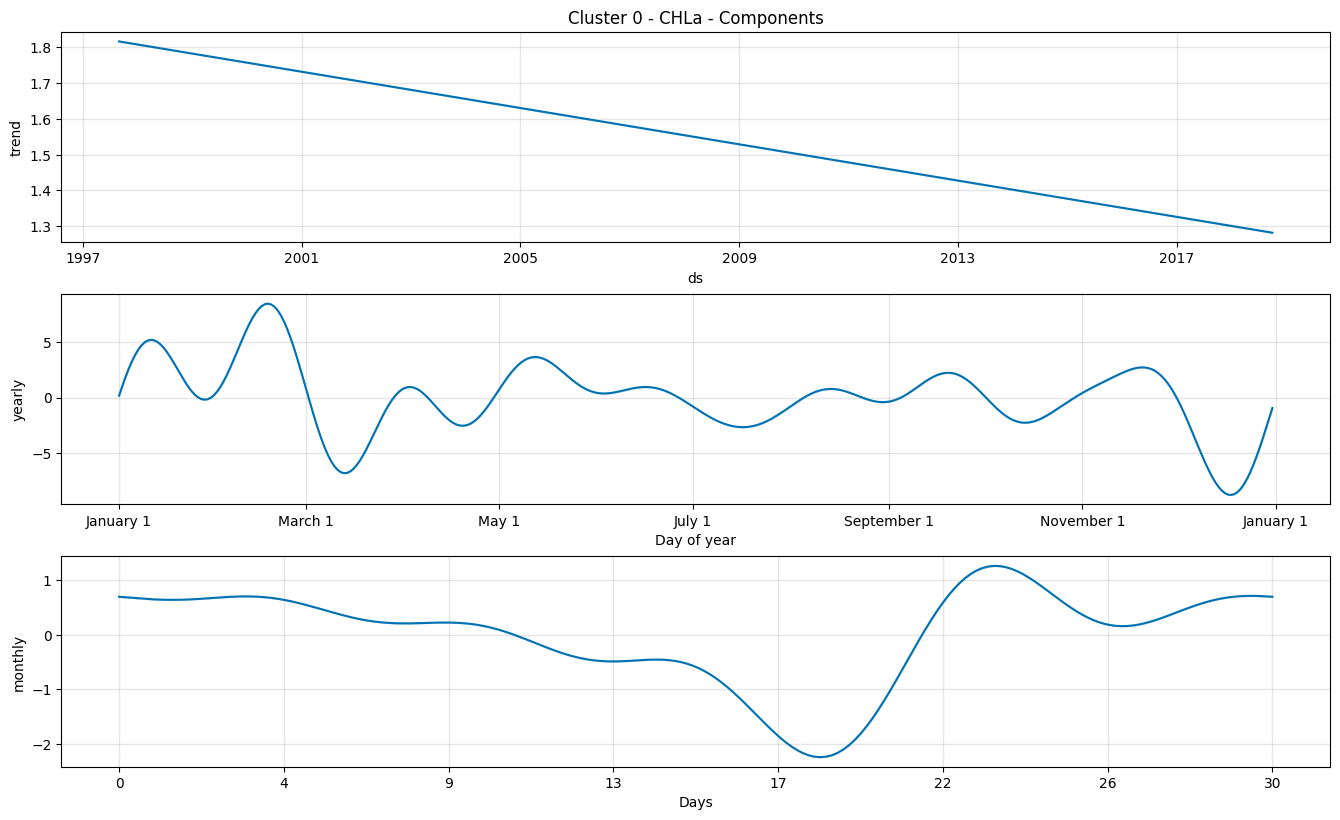

In [50]:
components_0_chla_fig = prophet_model_0_chla.plot_components(cluster_0_df_chla_pred)
components_0_chla_fig.set_size_inches(14, 8)
axes = components_0_chla_fig.get_axes()
axes[0].set_title("Cluster 0 - CHLa - Components")

Text(0.5, 1.0, 'Cluster 1 - CHLa - Components')

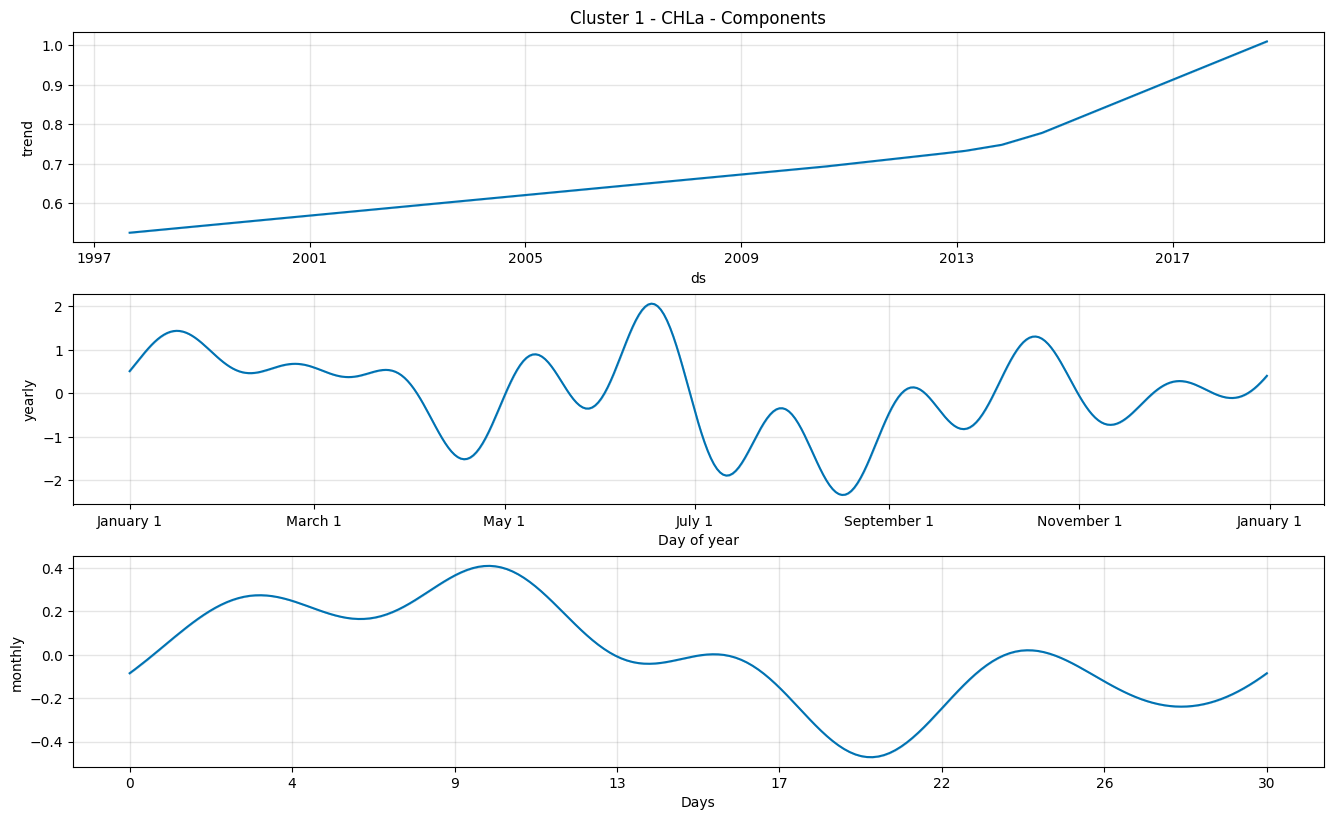

In [51]:
components_1_chla_fig = prophet_model_1_chla.plot_components(cluster_1_df_chla_pred)
components_1_chla_fig.set_size_inches(14, 8)
axes = components_1_chla_fig.get_axes()
axes[0].set_title("Cluster 1 - CHLa - Components")

Text(0.5, 1.0, 'Cluster 2 - CHLa - Components')

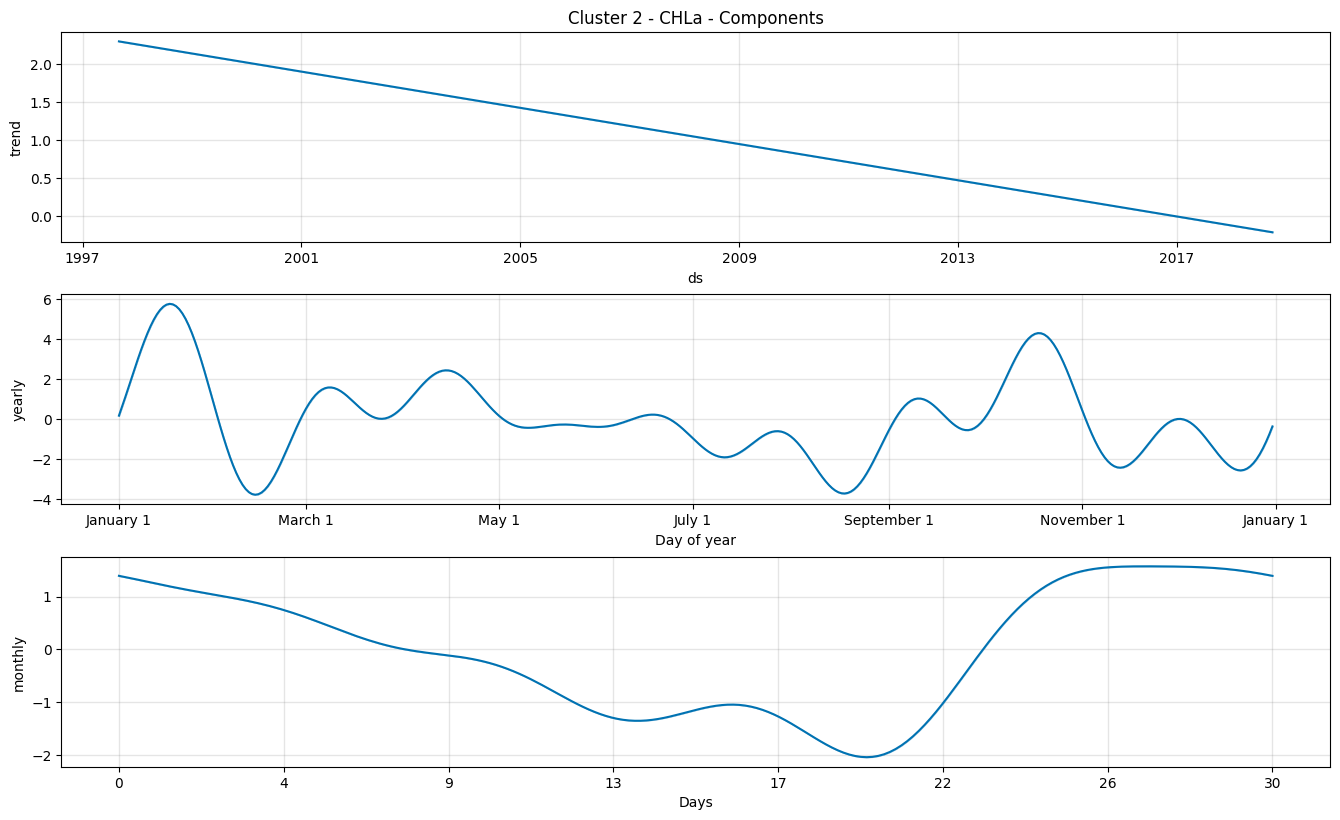

In [52]:
components_2_chla_fig = prophet_model_2_chla.plot_components(cluster_2_df_chla_pred)
components_2_chla_fig.set_size_inches(14, 8)
axes = components_2_chla_fig.get_axes()
axes[0].set_title("Cluster 2 - CHLa - Components")

Text(0.5, 1.0, 'Cluster 3 - CHLa - Components')

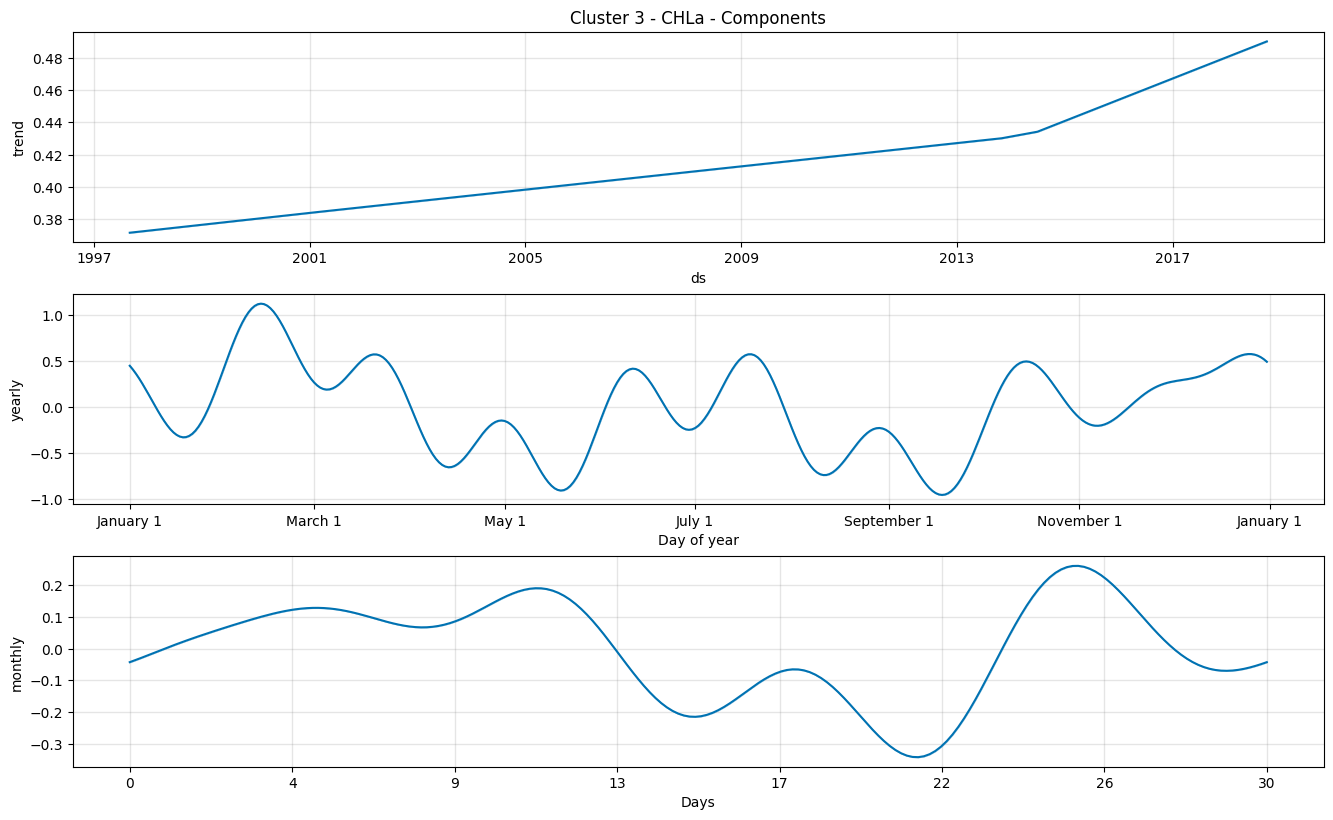

In [53]:
components_3_chla_fig = prophet_model_3_chla.plot_components(cluster_3_df_chla_pred)
components_3_chla_fig.set_size_inches(14, 8)
axes = components_3_chla_fig.get_axes()
axes[0].set_title("Cluster 3 - CHLa - Components")